# Workshop NLP avec spacy


On travaille sur un corpus de 11k+ tweets recoltés de juin 2017 a juin 2018 sur le hastag #abeilles


Le fichier est abeilles.csv

Les colonnes sont 

* author_handle: nom du compte
* likes: nombres de likes du tweet
* mentions: autres comptes mentionnés 
* permalink: du tweet
* shares: nombre de RT
* source_favorites: nombre de likes du compte
* source_followers: nombre de followers du compte
* source_following: nombre de comote suivis par le compte
* tags: hashtags present dans le tweet
* main: le texte du tweet

# NLP

On va regarder la frequence 

* des mots
* des tags 

puis avec le part of speech tagging

* des adjectifs
* des noms

avec les noun chunks:

* les groupes de mots

et avec le named entity recognition

* des entités

* Une fois identifies les principales entities, quels sont les adjectifs qui leur sont le plus associés

# popularité des tweets

Graphiquement peut on determiner s'il y a un lien entre la popularité du compte et le nombre de retweet et de likes

* creer une nouvelle variable popularité du tweet = likes + shares 
* creer une nouvelle variable popularité du compte = source_followers + source_following

Afficher le scatterplot de l'une par rapport à l'autre et en deduire s;il y a correlation ou non.

De meme, est ce que la longueur du tweet, ou le nombre de hashtag, est corrélé avec la popularité du tweet ?

* Obtient on d'autres resultats si on restreint le dataset aux tweets avec au moins 1 share ou like ?


# Similarité

Beaucoup de tweet se ressemblent.

En utilisant le module similarity de spacy, et en prenant un de ces tweets peut on trouver les tweets qui lui sont similaires ?






In [2]:
ll '/Users/alexis/amcp/upem/python0918/data/'


total 104064
drwx------@ 5 alexis  staff       170 Sep 12 10:24 AMO40_deputes_actifs_mandats_actifs_organes_divises_XV.csv/
-rw-r--r--@ 1 alexis  staff   3819276 Sep  2 14:17 AMO40_deputes_actifs_mandats_actifs_organes_divises_XV.csv.zip
-rw-r--r--  1 alexis  staff   3924732 Sep 16 10:47 abeilles.csv
drwxr-xr-x@ 9 alexis  staff       306 Sep 11 20:20 bbc/
-rw-r--r--@ 1 alexis  staff   2874078 Jan 26  2018 bbc-fulltext.zip
-rw-r--r--@ 1 alexis  staff  11192227 Sep  2 19:47 fete-de-la-musique-2018.csv
-rw-r--r--@ 1 alexis  staff  31310901 Sep  2 13:47 les-arbres.csv
-rw-r--r--@ 1 alexis  staff    145324 Sep 12 20:06 pg6099.txt


In [5]:
import pandas as pd

DATA_PATH = '/Users/alexis/amcp/upem/python0918/data/'
filename = 'abeilles.csv'

In [6]:
df = pd.read_csv(DATA_PATH + filename)

In [7]:
df.shape


(11246, 10)

In [38]:
df.tags.head()

0                   ['abeilles']
1    ['StopNéonics', 'abeilles']
2    ['StopNéonics', 'abeilles']
3    ['StopNeonics', 'abeilles']
4    ['StopNeonics', 'abeilles']
Name: tags, dtype: object

In [42]:
def tags_to_liste(tags):
    '''
    Transforme une string de type : "['abeilles', 'néonicotinoïdes', 'pétition']"
    en une liste : [abeilles,néonicotinoïdes,pétition]
    '''
    # d'abord enlever les ' les remplacer par '' (vide)
    tags = tags.replace("'",'')

    # puis enlever les [ et les ] aussi les remplacer par '' (vide)
    tags = tags.replace("[",'').replace("]",'')

    # enfin transformer la string en liste en splittant sur les virgules ,
    tags = tags.split(',')

    # puis enlever les espaces a droite et a gauche des mots
    tags = [ mot.strip() for mot in  tags  ]

    return tags

# tester la fonction

assert tags_to_liste("['abeilles', 'néonicotinoïdes', 'pétition']") == ['abeilles','néonicotinoïdes','pétition']

assert tags_to_liste("['StopNeonics', 'abeilles']") == ['StopNeonics', 'abeilles']


In [36]:
# tags_to_liste("['abeilles', 'néonicotinoïdes', 'pétition']")
tags = "['abeilles', 'néonicotinoïdes', 'pétition']"

# d'abord enlever les ' les remplacer par '' (vide)
tags = tags.replace("'",'')
# puis enlever les [ et les ] aussi les remplacer par '' (vide)
tags = tags.replace("[",'').replace("]",'')
# tags = tags.replace(" ",'')
# enfin transformer la string en liste en splittant sur les virgules ,
tags = tags.split(',')

# puis enlever les espaces adroite et a gauche des mots
tags = [ mot.strip() for mot in  tags  ]

print(type(tags))
print(tags)

<class 'list'>
['abeilles', 'néonicotinoïdes', 'pétition']


In [46]:

tags_liste = []

for i, d in df[0:100].iterrows():
    tags_liste = tags_liste + tags_to_liste(d.tags)

print(tags_liste[0:20])
print(len(tags_liste))

print( "le mot {} apparait {} fois dans la liste des hashtags".format('abeilles', tags_liste.count('abeilles') ) )


['abeilles', 'StopNéonics', 'abeilles', 'StopNéonics', 'abeilles', 'StopNeonics', 'abeilles', 'StopNeonics', 'abeilles', 'StopNeonics', 'abeilles', 'abeilles', 'abeilles', 'apiculture', 'mellifère', 'miel', 'paris', 'tilleul', 'LFDay', 'abeilles']
276
le mot abeilles apprait 100 fois dans la liste des hashtags


In [44]:
[1,2,3] + [1,2,3]

[1, 2, 3, 1, 2, 3]

# 1. trouver les entités nommées via spacy


In [2]:
import spacy
nlp = spacy.load('fr')

In [4]:
import pandas as pd

DATA_PATH = './'
filename = 'abeilles.csv'

df = pd.read_csv(DATA_PATH + filename)
df.head()

,author_handle,likes,mentions,permalink,shares,source_favorites,source_followers,source_following,tags,main
0,BleuBlancCoeur,4.0,NaN,https://twitter.com/BleuBlancCoeur/status/8724...,5.0,5430.0,6420,3885.0,['abeilles'],« Des carences en oméga-3 pourraient expliquer...
1,VirginieDevigne,0.0,NaN,https://www.twitter.com/VirginieDevigne/status...,0.0,1302.0,154,723.0,"['StopNéonics', 'abeilles']",".@EPhilippePM résistez à la Com° EU, signez le..."
2,17070908,0.0,NaN,https://www.twitter.com/17070908/status/870697...,0.0,188.0,30,127.0,"['StopNéonics', 'abeilles']",".@N_Hulot résistez à la Com° EU, signez le déc..."
3,Cocop64,0.0,NaN,https://www.twitter.com/Cocop64/status/8710723...,0.0,0.0,0,0.0,"['StopNeonics', 'abeilles']",.@AgnesBuzyn Arrêtez le massacre des #abeilles...
4,mimi6werth,0.0,NaN,https://www.twitter.com/mimi6werth/status/8710...,0.0,0.0,0,0.0,"['StopNeonics', 'abeilles']",.@EPhilippePM Arrêtez le massacre des #abeille...


In [8]:
# renommer colonne 'main' en colonne 'tweet'

df.rename( columns= { 'main': 'tweet'   }, inplace = True  )

df.head(2)
# pour verifier que lq colonne tweet est bien dans la liste des colonnes de df
'tweet' in df.columns 

True

In [30]:
def find_entities(tweet):

    doc = nlp(tweet)

    liste_entities = []
    for ent in doc.ents:
        liste_entities.append(ent.text)

    return liste_entities    

# tester la fonction
tweet = "Vincent Lamamy rejoint Panier de Touraine !!! Il propose diverses variétés de miel ainsi que du pollen sec. miel abeilles Tours locavore"
assert find_entities(tweet) == ['Vincent Lamamy', 'Panier de Touraine', 'Tours']



In [31]:
def find_label(tweet):

    doc = nlp(tweet)

    liste_label = []
    for ent in doc.ents:
        liste_label.append(ent.label_)

    return liste_label    

# tester la fonction
tweet = "Vincent Lamamy rejoint Panier de Touraine !!! Il propose diverses variétés de miel ainsi que du pollen sec. miel abeilles Tours locavore"
assert find_label(tweet) == ['PER', 'PER', 'LOC']

find_label(tweet)

['PER', 'PER', 'LOC']

tuple

In [34]:
# pour chaque tweet, trouver les entites nommées et les mettre quelque part
from tqdm import tqdm 

list_named_entities = []

for i,d in tqdm(df[0:500].iterrows()):
    
    dico = {
        "idx": i,
        "tweet": d.tweet,
        "entities": find_entities(d.tweet),
        "nature":  find_label(d.tweet)
    }
    list_named_entities.append(dico)


df_entities = pd.DataFrame(list_named_entities)
print("df_entities a {} rows et {} colonnes ".format(df_entities.shape[0], df_entities.shape[1] ))

df_entities.head(5)


500it [00:12, 38.89it/s]

df_entities a 500 rows et 4 colonnes 


,entities,idx,nature,tweet
0,[],0,[],« Des carences en oméga-3 pourraient expliquer...
1,"[Com°, StopNéonics]",1,"[MISC, MISC]",".@EPhilippePM résistez à la Com° EU, signez le..."
2,"[.@N_Hulot, Com° EU, StopNéonics]",2,"[MISC, MISC, MISC]",".@N_Hulot résistez à la Com° EU, signez le déc..."
3,"[Arrêtez, StopNeonics, Com°]",3,"[PER, MISC, MISC]",.@AgnesBuzyn Arrêtez le massacre des #abeilles...
4,"[Arrêtez, StopNeonics, Com°]",4,"[PER, MISC, MISC]",.@EPhilippePM Arrêtez le massacre des #abeille...


In [35]:
df_entities.head(50)

,entities,idx,nature,tweet
0,[],0,[],« Des carences en oméga-3 pourraient expliquer...
1,"[Com°, StopNéonics]",1,"[MISC, MISC]",".@EPhilippePM résistez à la Com° EU, signez le..."
2,"[.@N_Hulot, Com° EU, StopNéonics]",2,"[MISC, MISC, MISC]",".@N_Hulot résistez à la Com° EU, signez le déc..."
3,"[Arrêtez, StopNeonics, Com°]",3,"[PER, MISC, MISC]",.@AgnesBuzyn Arrêtez le massacre des #abeilles...
4,"[Arrêtez, StopNeonics, Com°]",4,"[PER, MISC, MISC]",.@EPhilippePM Arrêtez le massacre des #abeille...
5,"[StopNeonics, Com°]",5,"[MISC, MISC]",.@N_Hulot Arrêtez le massacre des #abeilles en...
6,[],6,[],#abeilles en diminution nette dans mon jardin....
7,[],7,[],Le #tilleul: une floraison essentielle pour la...
8,[agTech],8,[LOC],"#LFDay On y parle #agTech, #innovations #agri ..."
9,[],9,[],"J'aime pas être interrompu dans mon taf, sauf ..."


# Trouvons seulement les PER


In [40]:
def find_person(texte):
    
    doc = nlp(texte)

    liste_person = []
    for ent in doc.ents:
        if ent.label_ == 'PER':
            liste_person.append(ent.text)

    return liste_person    

# tester la fonction
texte = '''Vincent Lamamy rejoint Panier de Touraine !!! 
        Il propose diverses variétés de miel ainsi que du pollen sec. miel abeilles Tours locavore'''

find_person("Elon Musk envoie des trucs dans l'espace")

['Elon Musk']

In [44]:
from tqdm import tqdm 

list_person = []

for i,row in df[0:500].iterrows():
    
    dico = {
        "idx": i,
        "tweet": row.tweet,
        "person": find_person(row.tweet),
    }
    list_person.append(dico)


df_person = pd.DataFrame(list_person)
print("df_person a {} rows et {} colonnes ".format(df_person.shape[0], df_person.shape[1] ))

df_person.head(5)


df_person a 500 rows et 3 colonnes 


,idx,person,tweet
0,0,[],« Des carences en oméga-3 pourraient expliquer...
1,1,[],".@EPhilippePM résistez à la Com° EU, signez le..."
2,2,[],".@N_Hulot résistez à la Com° EU, signez le déc..."
3,3,[Arrêtez],.@AgnesBuzyn Arrêtez le massacre des #abeilles...
4,4,[Arrêtez],.@EPhilippePM Arrêtez le massacre des #abeille...


In [47]:
df_person.head(50)

,idx,person,tweet
0,0,[],« Des carences en oméga-3 pourraient expliquer...
1,1,[],".@EPhilippePM résistez à la Com° EU, signez le..."
2,2,[],".@N_Hulot résistez à la Com° EU, signez le déc..."
3,3,[Arrêtez],.@AgnesBuzyn Arrêtez le massacre des #abeilles...
4,4,[Arrêtez],.@EPhilippePM Arrêtez le massacre des #abeille...
5,5,[],.@N_Hulot Arrêtez le massacre des #abeilles en...
6,6,[],#abeilles en diminution nette dans mon jardin....
7,7,[],Le #tilleul: une floraison essentielle pour la...
8,8,[],"#LFDay On y parle #agTech, #innovations #agri ..."
9,9,[],"J'aime pas être interrompu dans mon taf, sauf ..."


In [43]:
for i,row in df[0:5].iterrows():
    print()
    print(row.tweet)
    print(find_person(row.tweet))
    
    


« Des carences en oméga-3 pourraient expliquer la disparition massive des colonies d’#abeilles » [@Jerusalem_Post] : http://www.jpost.com/Edition-Francaise/Social-Eco/Abeilles-en-d%C3%A9tresse-494781 …
[]

.@EPhilippePM résistez à la Com° EU, signez le décret #StopNéonics interdisant les pesticides tueurs d'#abeilles
[]

.@N_Hulot résistez à la Com° EU, signez le décret #StopNéonics interdisant les pesticides tueurs d'#abeilles
[]

.@AgnesBuzyn Arrêtez le massacre des #abeilles en signant le décret #StopNeonics contre avis Com° EU et lobbies
['Arrêtez']

.@EPhilippePM Arrêtez le massacre des #abeilles en signant le décret #StopNeonics contre avis Com° EU et lobbies
['Arrêtez']


# toutes les personnes dans une liste simple

In [55]:
from tqdm import tqdm 

list_person = []

for i,row in tqdm(df.iterrows()):
    
        list_person = list_person + find_person(row.tweet)


11246it [02:44, 68.25it/s]


In [ ]:
# list_person = [  find_person(row.tweet) for i,row in tqdm(df.iterrows())  ]

In [56]:
list_person[100:110]

['Mélenchon',
 '@N_Hulot',
 'Stéphane',
 'Gvt',
 'Luc Mélenchon',
 'Bravo 👎 @StTRAVERT',
 'Merci @N_Hulot',
 'Hulot',
 'Macron',
 'Stéphane Travert']

In [58]:
from collections import Counter

Counter(list_person).most_common(50)


[('Sauvez', 2670),
 ('\xa0 ', 90),
 ('Pesticides', 89),
 ('Apiculture', 82),
 ('@N_Hulot', 63),
 ('Hulot', 59),
 ('Stop', 48),
 ('Découvrez', 43),
 ('Votez', 42),
 ('Macron', 40),
 ('Retrouvez', 34),
 ('Glyphosate', 29),
 ('Nicolas Hulot', 25),
 ('Agriculture', 23),
 ('Varroa', 21),
 ('–', 20),
 ('Victoire', 15),
 ('Plantez', 11),
 ('Saviez', 11),
 ('Einstein', 11),
 ('Expli', 11),
 ('Jean', 10),
 ('Bonne', 10),
 ('Miel', 10),
 ('Insérez', 10),
 ('Albert Einstein', 10),
 ('Stéphane Travert', 9),
 ('Appel', 9),
 ('Apiculteur', 9),
 ('Communiqué', 9),
 ('Soutien', 9),
 ('Arrêtez', 8),
 ('Bee', 8),
 ('Muriel Gerkens', 8),
 ('Merci', 7),
 ('Keep', 7),
 ('Sinon', 7),
 ('Rdv', 7),
 ('Sanctuarisons', 7),
 ('Sven Niel', 7),
 ('Allez', 6),
 ('Closer', 6),
 ('Faites', 6),
 ('Hubert Reeves', 6),
 ('Reportage', 5),
 ('Jardin', 5),
 ('Stéphane', 5),
 ('EnMarche', 5),
 ('\xa0 🐝', 5),
 ('Abeille', 5)]

In [52]:
list_person.remove('Arrêtez')
Counter(list_person).most_common(10)

[('Arrêtez', 7),
 ('Agriculture', 6),
 ('@N_Hulot', 4),
 ('Retrouvez', 3),
 ('Jardin', 3),
 ('Jacqueline Freeman', 2),
 ('Samedi', 2),
 ('BALEXERT', 2),
 ('Balexert', 2),
 ('Découvrez', 2)]

In [53]:
?list_person.remove

In [60]:
faux_amis = ['Sauvez', '\xa0 ' ,'Arrêtez', 'Retrouvez', 'Agriculture', 'Jardin', 'Découvrez' ]

bonne_liste = [mot for mot in list_person if mot not in faux_amis]

Counter(bonne_liste).most_common(40)

[('Pesticides', 89),
 ('Apiculture', 82),
 ('@N_Hulot', 63),
 ('Hulot', 59),
 ('Stop', 48),
 ('Votez', 42),
 ('Macron', 40),
 ('Glyphosate', 29),
 ('Nicolas Hulot', 25),
 ('Varroa', 21),
 ('–', 20),
 ('Victoire', 15),
 ('Plantez', 11),
 ('Saviez', 11),
 ('Einstein', 11),
 ('Expli', 11),
 ('Jean', 10),
 ('Bonne', 10),
 ('Miel', 10),
 ('Insérez', 10),
 ('Albert Einstein', 10),
 ('Stéphane Travert', 9),
 ('Appel', 9),
 ('Apiculteur', 9),
 ('Communiqué', 9),
 ('Soutien', 9),
 ('Bee', 8),
 ('Muriel Gerkens', 8),
 ('Merci', 7),
 ('Keep', 7),
 ('Sinon', 7),
 ('Rdv', 7),
 ('Sanctuarisons', 7),
 ('Sven Niel', 7),
 ('Allez', 6),
 ('Closer', 6),
 ('Faites', 6),
 ('Hubert Reeves', 6),
 ('Reportage', 5),
 ('Stéphane', 5)]

# tous les tweets qui contiennent Einstein

In [ ]:

condition = df.tweet.str.contains('Einstein')

df[condition].tweet.values

In [78]:
from tqdm import tqdm 
import unidecode

def find_noun(texte):

    doc = nlp(texte)

    liste_noun = []
    for token in doc:
        if token.pos_ == 'NOUN':
            sans_accent = unidecode.unidecode(token.text)
            liste_noun.append(sans_accent)

    return liste_noun    

# seulement sur les tweets qui contiennent Einstein
mot = 'miel'
condition = df.tweet.str.contains(mot)
print("on a {} tweets qui contiennent le mot {} ".format(df[condition].shape[0], mot))


substantifs = []

for i,row in tqdm(df[condition].iterrows()):
    
        substantifs = substantifs + find_noun(row.tweet)

len(substantifs)

7it [00:00, 65.93it/s]

on a 823 tweets qui contiennent le mot miel 


823it [00:13, 54.97it/s]


6915

In [79]:

Counter(substantifs).most_common(20)

[('#', 1354),
 ('miel', 300),
 ('', 211),
 ('abeilles', 115),
 ('apiculture', 100),
 ('ruches', 89),
 ('biodiversite', 83),
 ('%', 56),
 ('production', 52),
 ('recolte', 49),
 ('fleurs', 47),
 ('apiculteur', 43),
 ('apiculteurs', 40),
 ('neonicotinoides', 38),
 ('bees', 35),
 ('ruche', 34),
 ('environnement', 34),
 ('pesticides', 34),
 ('abeille', 27),
 ('pollinisation', 27)]

# Similarité entre tweets


In [81]:
condition = df.tweet.str.contains('Arrêtez le massacre')
df[condition].shape

(12, 10)

In [87]:
tweet_original = df.loc[3].tweet
print(tweet_original )

.@AgnesBuzyn Arrêtez le massacre des #abeilles en signant le décret #StopNeonics contre avis Com° EU et lobbies


In [95]:
# token1.similarity(token2)

tweet_original = "La Commission européenne planche sur une interdiction totale des #néonicotinoïdes ! #abeilles #pétition"

doc_original = nlp(tweet_original)

similarites = []

for i, row in tqdm(df.iterrows()):
    doc_tweet  = nlp(row.tweet)
    score = doc_original.similarity(doc_tweet)
    similarites.append(score)




11246it [02:43, 68.74it/s]


(array([  1.,   1.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,   2.,   1.,
          3.,   4.,   1.,   6.,   6.,   5.,   3.,   4.,   7.,   8.,  14.,
         15.,  15.,  12.,  16.,  19.,  21.,  16.,  34.,  29.,  38.,  43.,
         56.,  61.,  69., 106., 123., 131., 164., 180., 195., 232., 267.,
        330., 493., 608., 758., 825., 730., 576., 452., 436., 431., 360.,
        315., 317., 330., 323., 318., 293., 262., 259., 235., 172., 132.,
        101.,  87.,  60.,  54.,  33.,  17.,   9.,   2.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   4.,   3.,
          3.]),
 array([-0.02165586, -0.0114393 , -0.00122274,  0.00899382,  0.01921038,
         0.02942694,  0.03964349,  0.04986005,  0.06007661,  0.07029317,
         0.08050973,  0.09072629,  0.10094285,  0.1111594 ,  0.12137596,
         0.13159252,  0.14180908,  0.15202564,  0.1622422 ,  0.17245876,
         0.18267531,  0.19

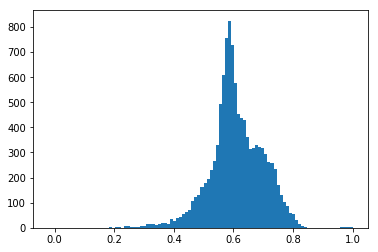

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(similarites, bins = 100)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,
          0.,   1.,   3.,   3.,   2.,   4.,   1.,   8.,   5.,   3.,   7.,
          5.,   6.,   4.,  11.,  14.,  11.,  14.,  15.,  22.,  23.,  17.,
         15.,  37.,  22.,  35.,  41.,  43.,  52.,  53.,  49.,  65.,  73.,
         72., 103.,  90., 100., 115.,  97., 148., 121., 141., 131., 161.,
        164., 176., 171., 222., 222., 283., 362., 541., 669., 838., 820.,
        747., 672., 560., 399., 365., 313., 232., 238., 185., 156., 131.,
        136., 124.,  69.,  85.,  59.,  59.,  37.,  27.,  20.,  21.,   8.,
          4.,   8.,   4.,   8.,  16.,   7.,   1.,  15.,  15.,   5.,  57.,
         48.]),
 array([0.13225368, 0.14072358, 0.14919348, 0.15766337, 0.16613327,
        0.17460317, 0.18307307, 0.19154297, 0.20001286, 0.20848276,
        0.21695266, 0.22542256, 0.23389245, 0.24236235, 0.25083225,
        0.25930215, 0.26777205, 0.27624194, 0.28471184, 0.29318174,
        0.30165164, 0.31012153, 0.31859143, 0.

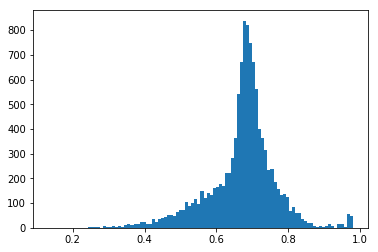

In [96]:
plt.hist(similarites, bins = 100)

In [97]:
tweet_original = "La Commission européenne planche sur une interdiction totale des #néonicotinoïdes ! #abeilles #pétition"

doc_original = nlp(tweet_original)

similarites = []
tweet_proches = []

for i, row in tqdm(df.iterrows()):
    doc_tweet  = nlp(row.tweet)
    score = doc_original.similarity(doc_tweet)
    similarites.append(score)
    if score > 0.85:
       tweet_proches.append(row.tweet) 

tweet_proches

11246it [02:46, 52.60it/s]


['La Commission européenne planche sur une interdiction totale des #néonicotinoïdes ! http://sumof.us/309310595t?rid=20105545\xa0… #abeilles #pétition',
 'La Commission européenne planche sur une interdiction totale des #néonicotinoïdes ! http://sumof.us/311100301t?rid=13092842\xa0… #abeilles #pétition',
 'La Commission européenne planche sur une interdiction totale des #néonicotinoïdes ! http://sumof.us/311459440t?rid=10734851\xa0… #abeilles #pétition',
 'La Commission européenne planche sur une interdiction totale des #néonicotinoïdes ! http://sumof.us/312932956t?rid=20140107\xa0… #abeilles #pétition',
 'La Commission européenne planche sur une interdiction totale des #néonicotinoïdes ! http://sumof.us/312356273t?rid=79529\xa0… #abeilles #pétition',
 'La Commission européenne planche sur une interdiction totale des #néonicotinoïdes ! http://sumof.us/312416647t?rid=20094464\xa0… #abeilles #pétition',
 'La Commission européenne planche sur une interdiction totale des #néonicotinoïdes !

In [98]:
len(tweet_proches)

244